In [198]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "dna-classification-dataset"

# **Table of Contents**
--------------
✅ **Load Libraries.**   
✅ **Data Load & EDA.**   
✅ **Data Transform.**   
✅ **Data Visulaization.**   
✅ **Prediction Modeling and ML.**   

# **Load Libraries**

In [199]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

# **Data Load & EDA**

In [200]:
df <- read.csv('/kaggle/input/dna-classification-dataset/synthetic_dna_dataset.csv') %>% janitor::clean_names()

## **Data Description**
-------------
**This dataset contains 3,000 synthetic DNA samples with 13 features designed for genomic data analysis, machine learning, and bioinformatics research. Each row represents a unique DNA sample with both sequence-level and statistical attributes.**   

🔹 Dataset Structure

Rows: 3,000

Columns: 13

🔹 Features Description

Sample_ID → Unique identifier for each DNA sample

Sequence → DNA sequence (string of A, T, C, G)

GC_Content → Percentage of Guanine (G) and Cytosine (C) in the sequence

AT_Content → Percentage of Adenine (A) and Thymine (T) in the sequence

Sequence_Length → Total sequence length

Num_A → Number of Adenine bases

Num_T → Number of Thymine bases

Num_C → Number of Cytosine bases

Num_G → Number of Guanine bases

kmer_3_freq → Average 3-mer (triplet) frequency score

Mutation_Flag → Binary flag indicating mutation presence (0 = No, 1 = Yes)

Class_Label → Class of the sample (Human, Bacteria, Virus, Plant)

Disease_Risk → Risk level associated with the sample (Low / Medium / High)

[Another Notebook here click](https://www.kaggle.com/datasets/miadul/dna-classification-dataset/data)

## **Summary**

In [201]:
glimpse(df)

Rows: 3,000
Columns: 13
$ sample_id       <chr> "SAMPLE_1", "SAMPLE_2", "SAMPLE_3", "SAMPLE_4", "SAMPL…
$ sequence        <chr> "CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCGCAGACAG…
$ gc_content      <dbl> 50, 45, 51, 55, 46, 45, 62, 46, 42, 59, 49, 44, 50, 49…
$ at_content      <dbl> 50, 55, 49, 45, 54, 55, 38, 54, 58, 41, 51, 56, 50, 51…
$ sequence_length <int> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,…
$ num_a           <int> 22, 27, 26, 28, 24, 29, 12, 26, 32, 18, 18, 30, 22, 27…
$ num_t           <int> 28, 28, 23, 17, 30, 26, 26, 28, 26, 23, 33, 26, 28, 24…
$ num_c           <int> 19, 22, 30, 23, 25, 26, 35, 23, 19, 31, 22, 26, 26, 22…
$ num_g           <int> 31, 23, 21, 32, 21, 19, 27, 23, 23, 28, 27, 18, 24, 27…
$ kmer_3_freq     <dbl> 0.986, 0.486, 0.367, 0.404, 0.818, 0.495, 0.570, 0.420…
$ mutation_flag   <int> 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, …
$ class_label     <chr> "Bacteria", "Virus", "Bacteria", "Human", "Human", "Pl…
$ disease_risk  

In [202]:
summary(df)

  sample_id           sequence           gc_content      at_content   
 Length:3000        Length:3000        Min.   :34.00   Min.   :34.00  
 Class :character   Class :character   1st Qu.:47.00   1st Qu.:47.00  
 Mode  :character   Mode  :character   Median :50.00   Median :50.00  
                                       Mean   :50.12   Mean   :49.88  
                                       3rd Qu.:53.00   3rd Qu.:53.00  
                                       Max.   :66.00   Max.   :66.00  
 sequence_length     num_a           num_t           num_c        num_g      
 Min.   :100     Min.   :11.00   Min.   : 9.00   Min.   :10   Min.   :12.00  
 1st Qu.:100     1st Qu.:22.00   1st Qu.:22.00   1st Qu.:22   1st Qu.:22.00  
 Median :100     Median :25.00   Median :25.00   Median :25   Median :25.00  
 Mean   :100     Mean   :24.95   Mean   :24.93   Mean   :25   Mean   :25.12  
 3rd Qu.:100     3rd Qu.:28.00   3rd Qu.:28.00   3rd Qu.:28   3rd Qu.:28.00  
 Max.   :100     Max.   :40.00   Ma

In [203]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_id*,1,3000,1500.5000000,866.1697293,1500.500,1500.5000000,1111.9500000,1.0,3000,2999.0,0.00000000,-1.201200066,15.814023313
sequence*,2,3000,1500.5000000,866.1697293,1500.500,1500.5000000,1111.9500000,1.0,3000,2999.0,0.00000000,-1.201200066,15.814023313
gc_content,3,3000,50.1200000,5.0626880,50.000,50.0716667,4.4478000,34.0,66,32.0,0.06111442,-0.006343262,0.092431615
at_content,4,3000,49.8800000,5.0626880,50.000,49.9283333,4.4478000,34.0,66,32.0,-0.06111442,-0.006343262,0.092431615
sequence_length,5,3000,100.0000000,0.0000000,100.000,100.0000000,0.0000000,100.0,100,0.0,NaN,NaN,0.000000000
num_a,6,3000,24.9506667,4.3174583,25.000,24.9041667,4.4478000,11.0,40,29.0,0.10751395,0.066864871,0.078825644
num_t,7,3000,24.9293333,4.3177024,25.000,24.8591667,4.4478000,9.0,42,33.0,0.15912676,0.086886769,0.078830099
num_c,8,3000,25.0040000,4.3490561,25.000,24.9695833,4.4478000,10.0,42,32.0,0.08199807,-0.019423309,0.079402537
num_g,9,3000,25.1160000,4.3296027,25.000,25.0675000,4.4478000,12.0,42,30.0,0.11768295,0.148469660,0.079047368


In [204]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             3000  
Number of columns          13    
_______________________          
Column type frequency:           
  character                4     
  numeric                  9     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 sample_id             0             1   8  11     0     3000          0
2 sequence              0             1 100 100     0     3000          0
3 class_label           0             1   5   8     0        4          0
4 disease_risk          0             1   3   6     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate    mean    sd    p0    p25     p50
1 gc_con

## **Checking Missing Value & Duplicate Value**

In [205]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
sample_id,0
sequence,0
gc_content,0
at_content,0
sequence_length,0
num_a,0
num_t,0
num_c,0
num_g,0


In [206]:
sum(duplicated(df))

[1] 0

In [207]:
head(df)

,sample_id,sequence,gc_content,at_content,sequence_length,num_a,num_t,num_c,num_g,kmer_3_freq,mutation_flag,class_label,disease_risk
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>
1,SAMPLE_1,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCGCAGACAGACTTTAAAACGAACCTTGCGGCAATTGCGGGCGAGAAGTTGGCTTAG,50,50,100,22,28,19,31,0.986,0,Bacteria,High
2,SAMPLE_2,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCACAACATTTTTAGATAATAGGCCGCGTTGTCTACGAAACTCAGCCGGCACGTTGC,45,55,100,27,28,22,23,0.486,1,Virus,Medium
3,SAMPLE_3,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTAGGGTAGACTCCCTCGAACATGTTGGCATTAAGACTTCTCCGCACCCCAACCACC,51,49,100,26,23,30,21,0.367,1,Bacteria,Low
4,SAMPLE_4,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTGAACGCATGGGACCCGCCTTGGAGGTTTAGATCAGTCATCCGGCGAAGTGAGGGA,55,45,100,28,17,23,32,0.404,0,Human,Medium
5,SAMPLE_5,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTTCCTCGGAATATAGGGTACCAACATCATACTTTGCGGCAGCTGATGGCCTATAGC,46,54,100,24,30,25,21,0.818,0,Human,High
6,SAMPLE_6,GCGGCTTGTTATCCTGGCAACGCGTTCAACGTCTCAGCACAGTAACTCCTAAAATCAACTCTGATGTTGATTCGAATAGCTTCAAAACCAATGCAAGTGC,45,55,100,29,26,26,19,0.495,1,Plant,Low


# **2. Data Transformation**

In [208]:
df <- df %>% select(-sample_id, -sequence_length)

In [209]:
df <- df %>% rename(Adenine = num_a , Thymine = num_t , Cytosine = num_c , Guanine = num_g)

In [210]:
df <- df %>% mutate(across(
    c(
        where(is.character)
     ),
    ~as.factor(.x)
    )
)

In [211]:
head(df)

,sequence,gc_content,at_content,Adenine,Thymine,Cytosine,Guanine,kmer_3_freq,mutation_flag,class_label,disease_risk
,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCGCAGACAGACTTTAAAACGAACCTTGCGGCAATTGCGGGCGAGAAGTTGGCTTAG,50,50,22,28,19,31,0.986,0,Bacteria,High
2,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCACAACATTTTTAGATAATAGGCCGCGTTGTCTACGAAACTCAGCCGGCACGTTGC,45,55,27,28,22,23,0.486,1,Virus,Medium
3,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTAGGGTAGACTCCCTCGAACATGTTGGCATTAAGACTTCTCCGCACCCCAACCACC,51,49,26,23,30,21,0.367,1,Bacteria,Low
4,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTGAACGCATGGGACCCGCCTTGGAGGTTTAGATCAGTCATCCGGCGAAGTGAGGGA,55,45,28,17,23,32,0.404,0,Human,Medium
5,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTTCCTCGGAATATAGGGTACCAACATCATACTTTGCGGCAGCTGATGGCCTATAGC,46,54,24,30,25,21,0.818,0,Human,High
6,GCGGCTTGTTATCCTGGCAACGCGTTCAACGTCTCAGCACAGTAACTCCTAAAATCAACTCTGATGTTGATTCGAATAGCTTCAAAACCAATGCAAGTGC,45,55,29,26,26,19,0.495,1,Plant,Low


# **3. Data Visualization**

In [212]:
num_cols <- df %>% select(where(is.numeric), -mutation_flag) %>% colnames()
cat_cols <- df %>% select(where(is.factor),-sequence) %>% colnames()

cat_cols <- c(cat_cols, 'mutation_flag')

In [213]:
cat('num_cols :', num_cols,'\n')
cat('length :', length(num_cols),'\n')
cat('------------------------------\n')
cat('cat_cols :', cat_cols,'\n')
cat('length :', length(cat_cols),'\n')

num_cols : gc_content at_content Adenine Thymine Cytosine Guanine kmer_3_freq 
length : 7 
------------------------------
cat_cols : class_label disease_risk mutation_flag 
length : 3 


## **Histogram & Boxplot & Densityplot**

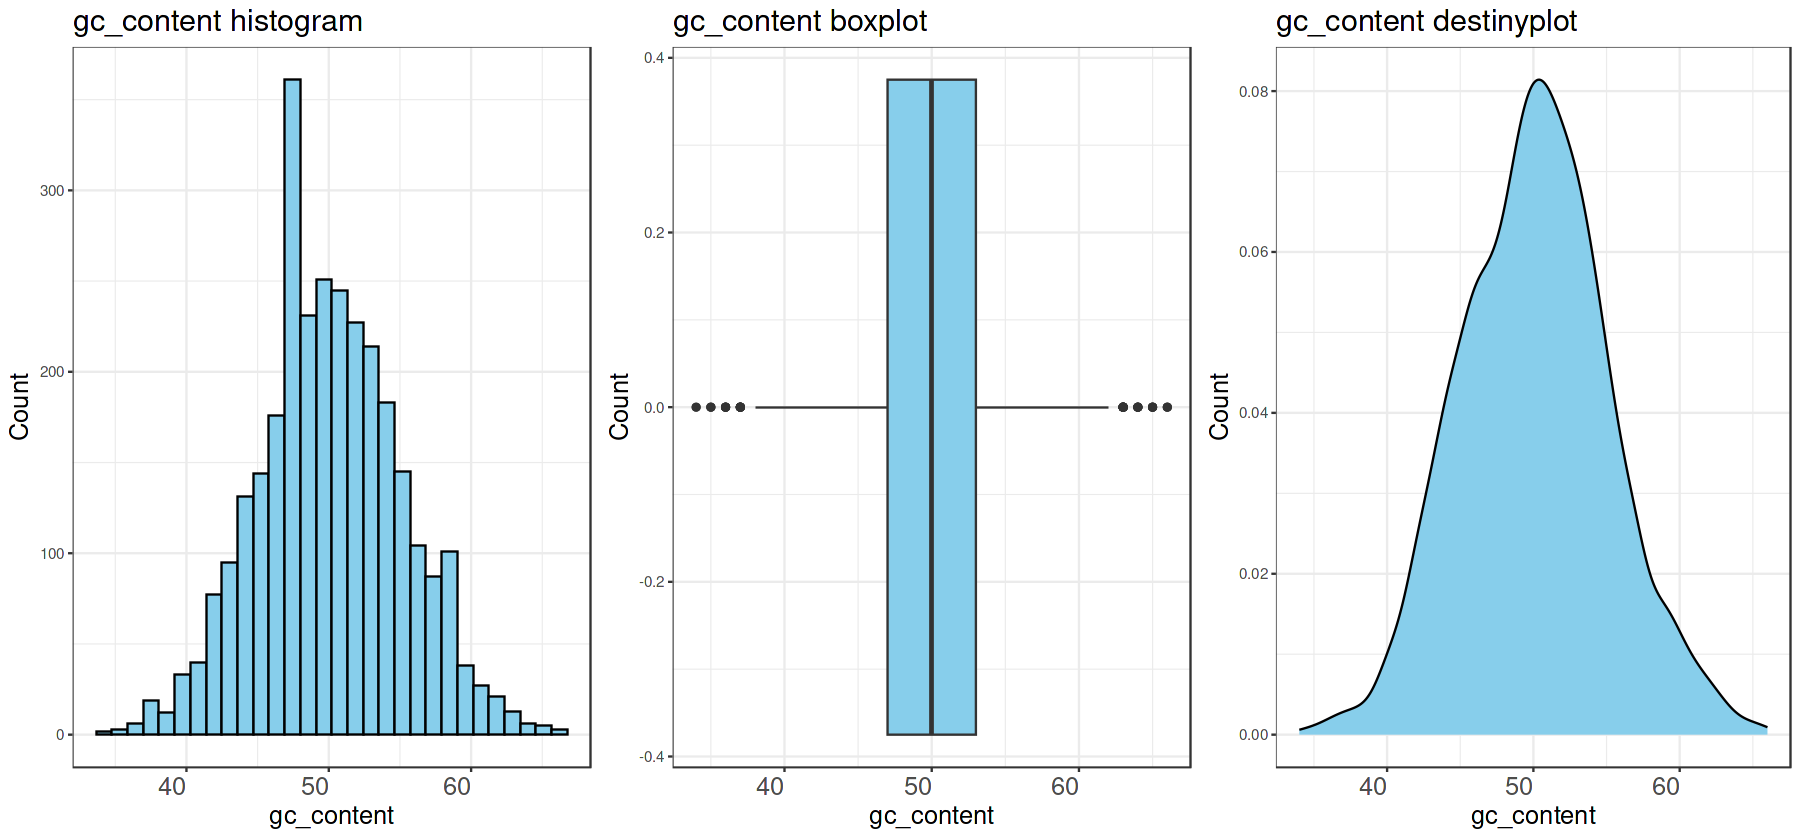

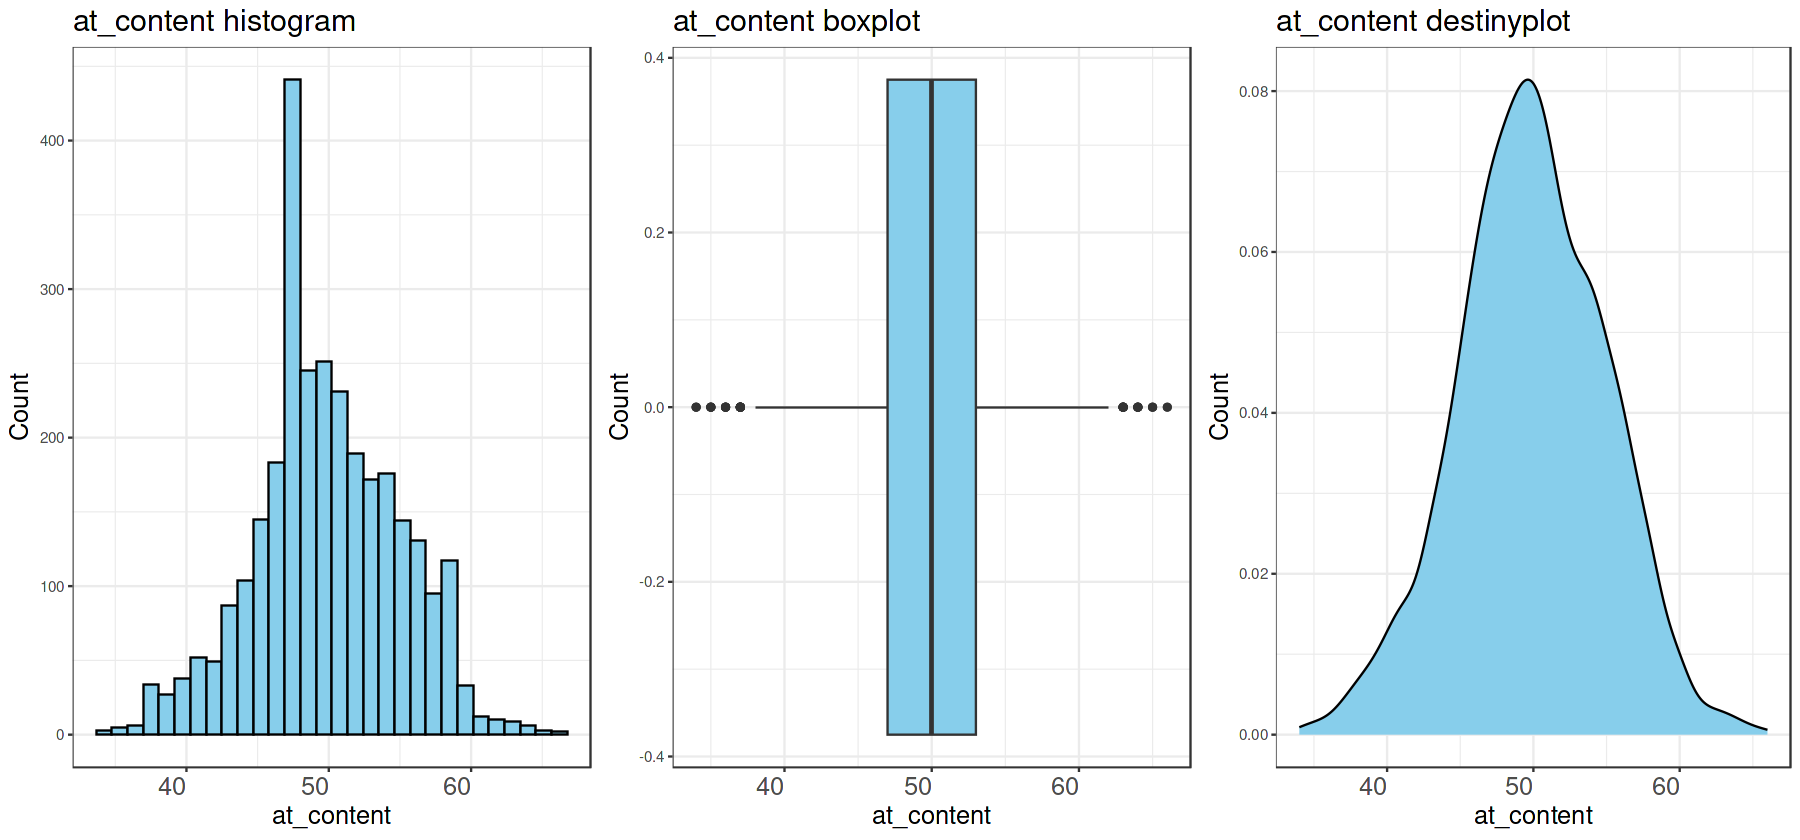

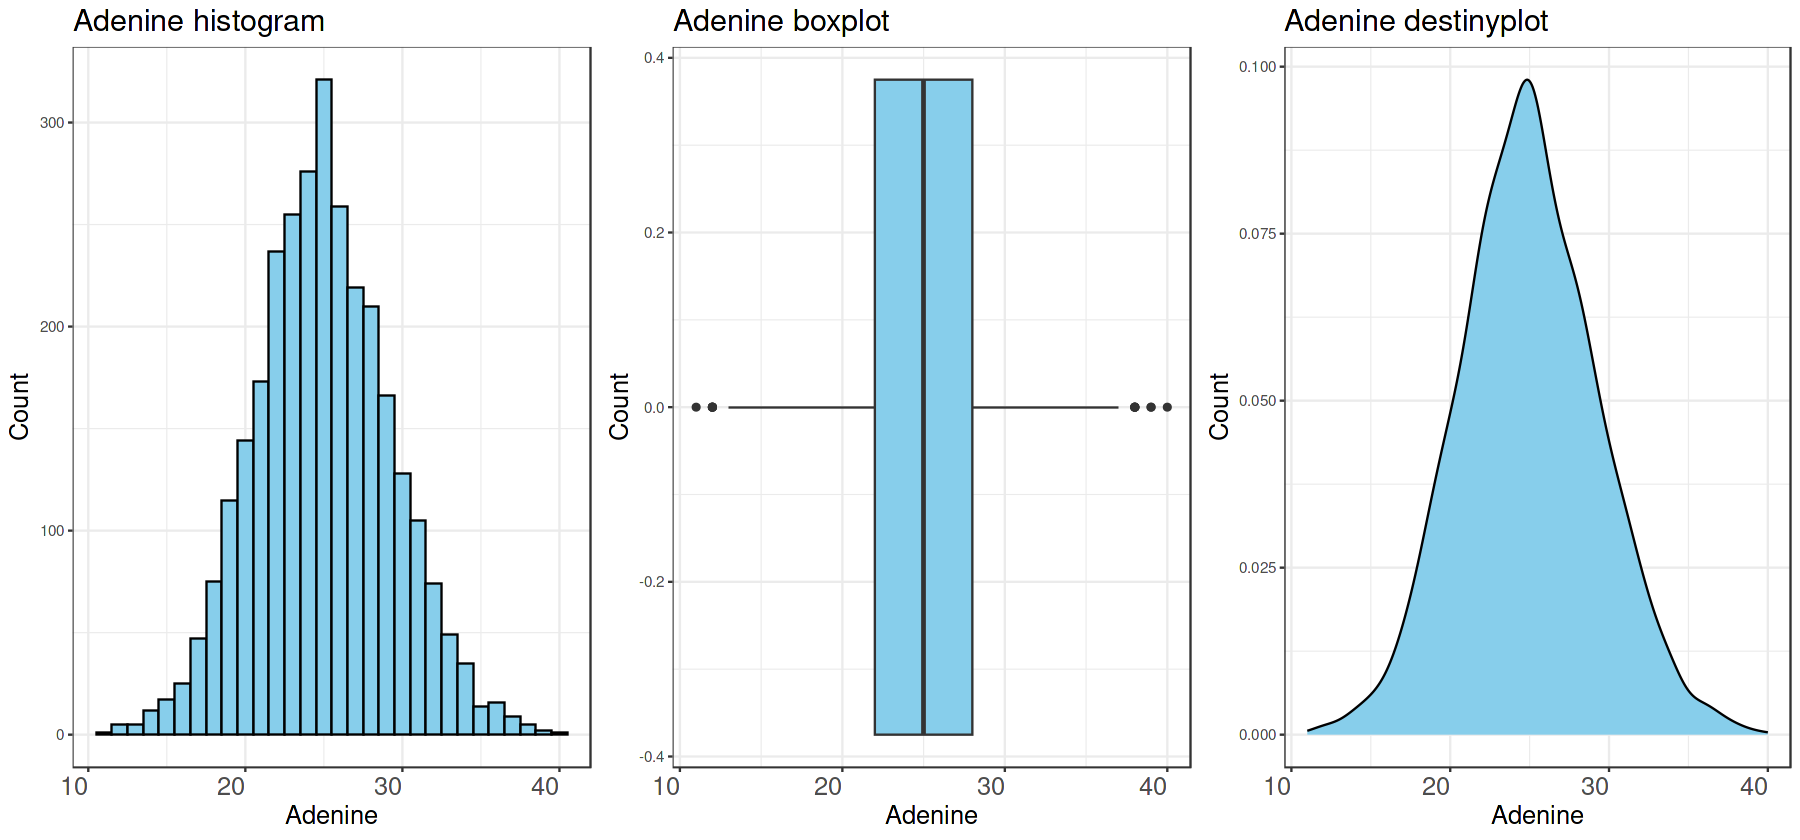

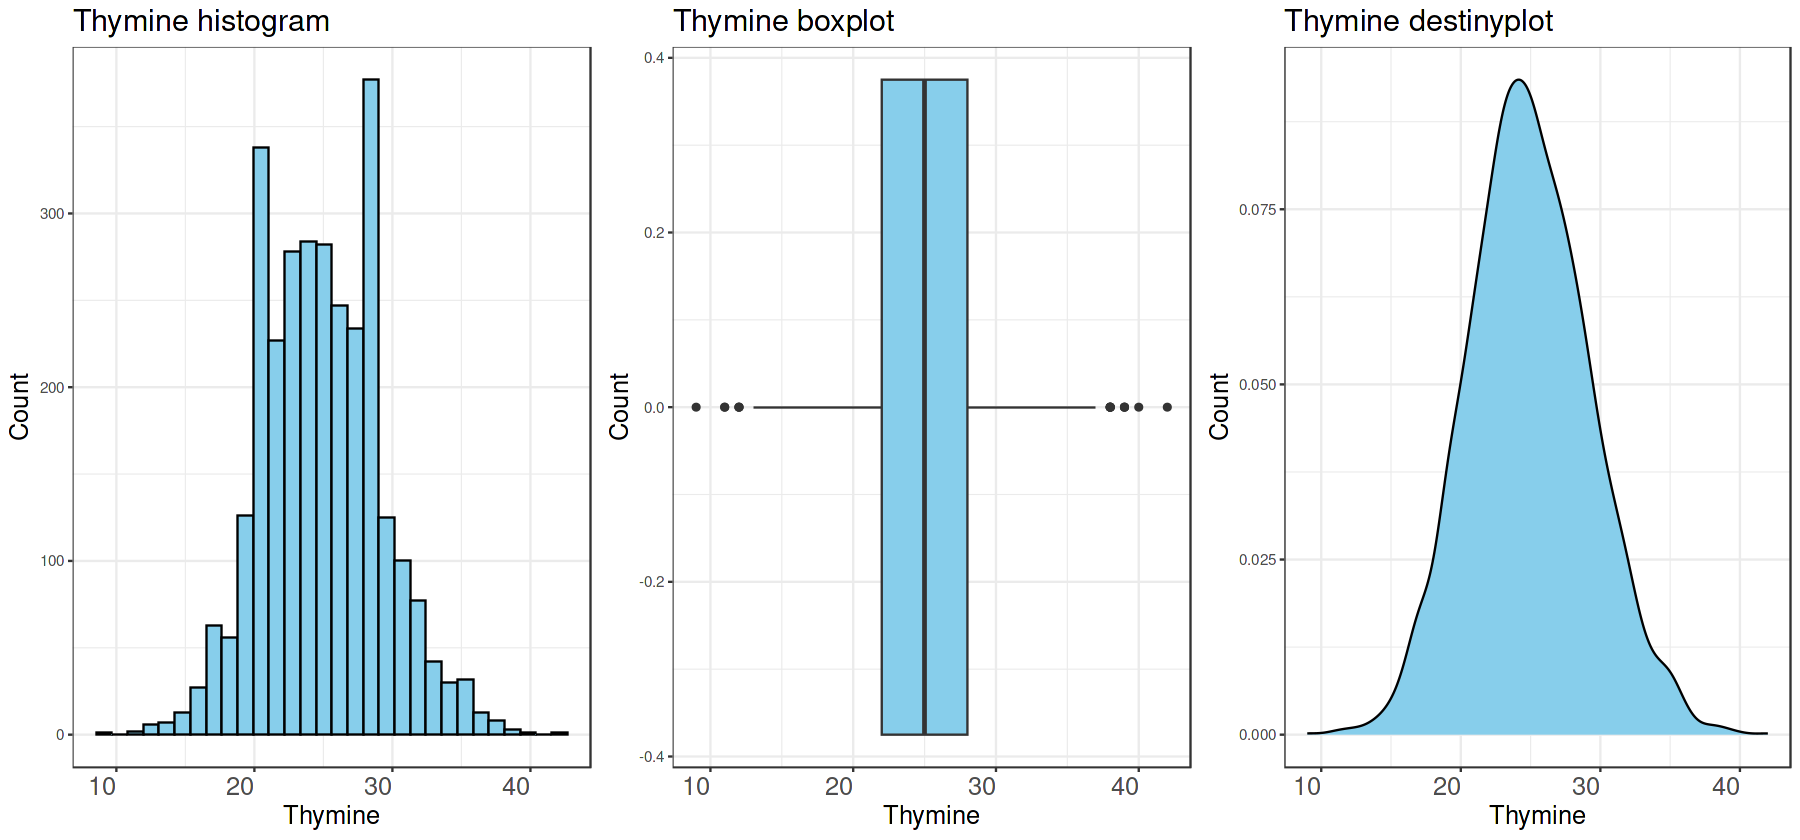

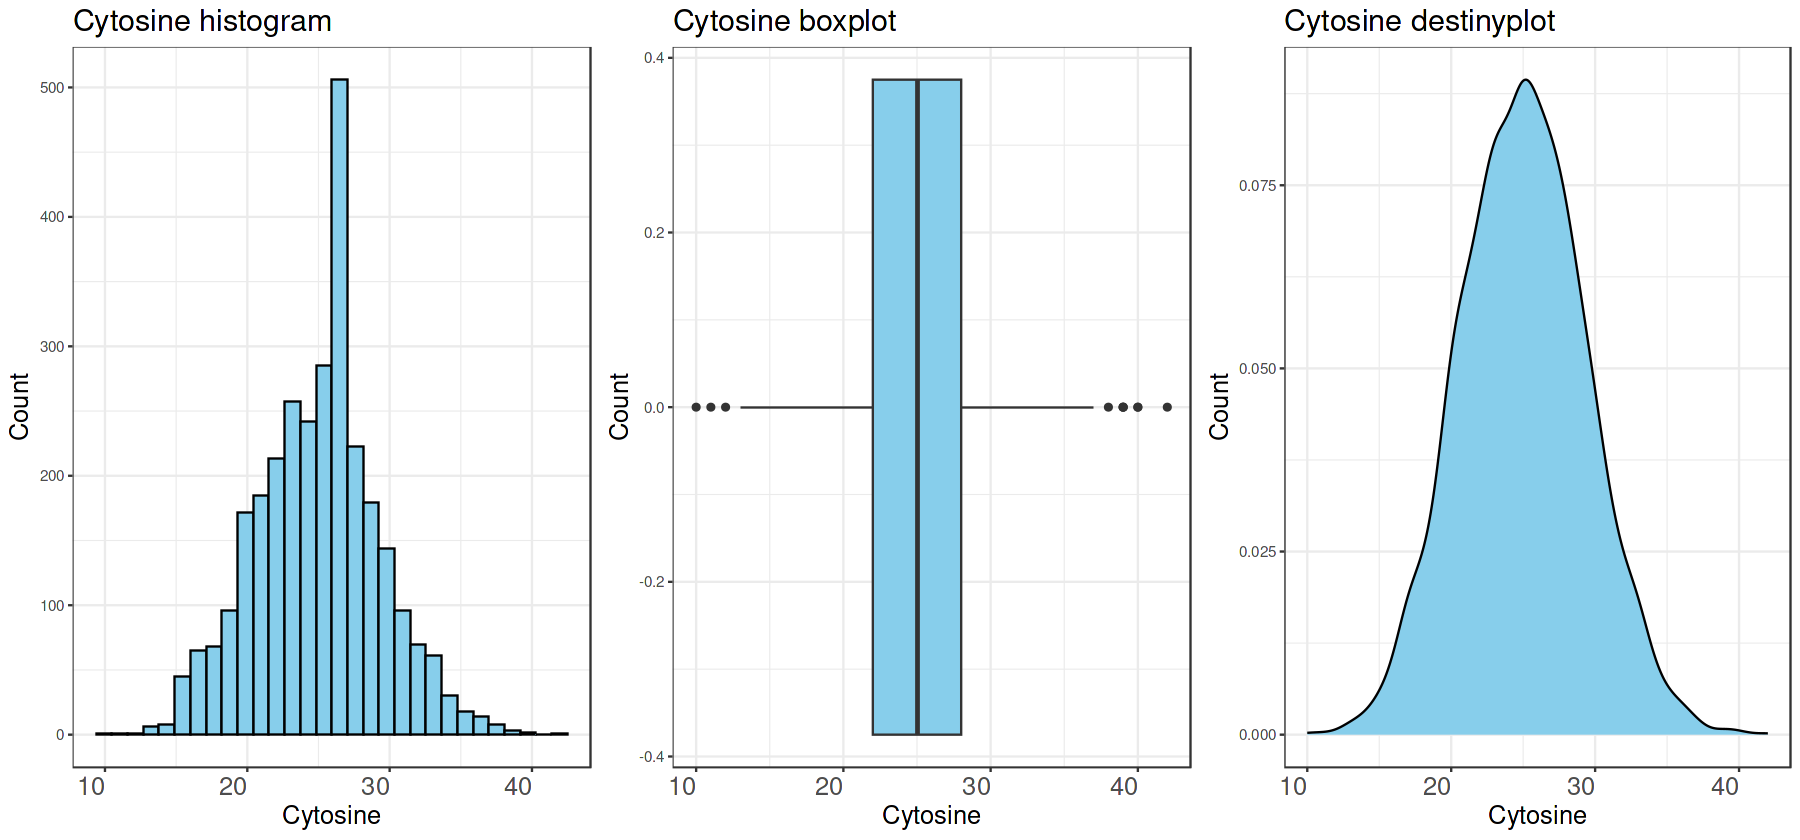

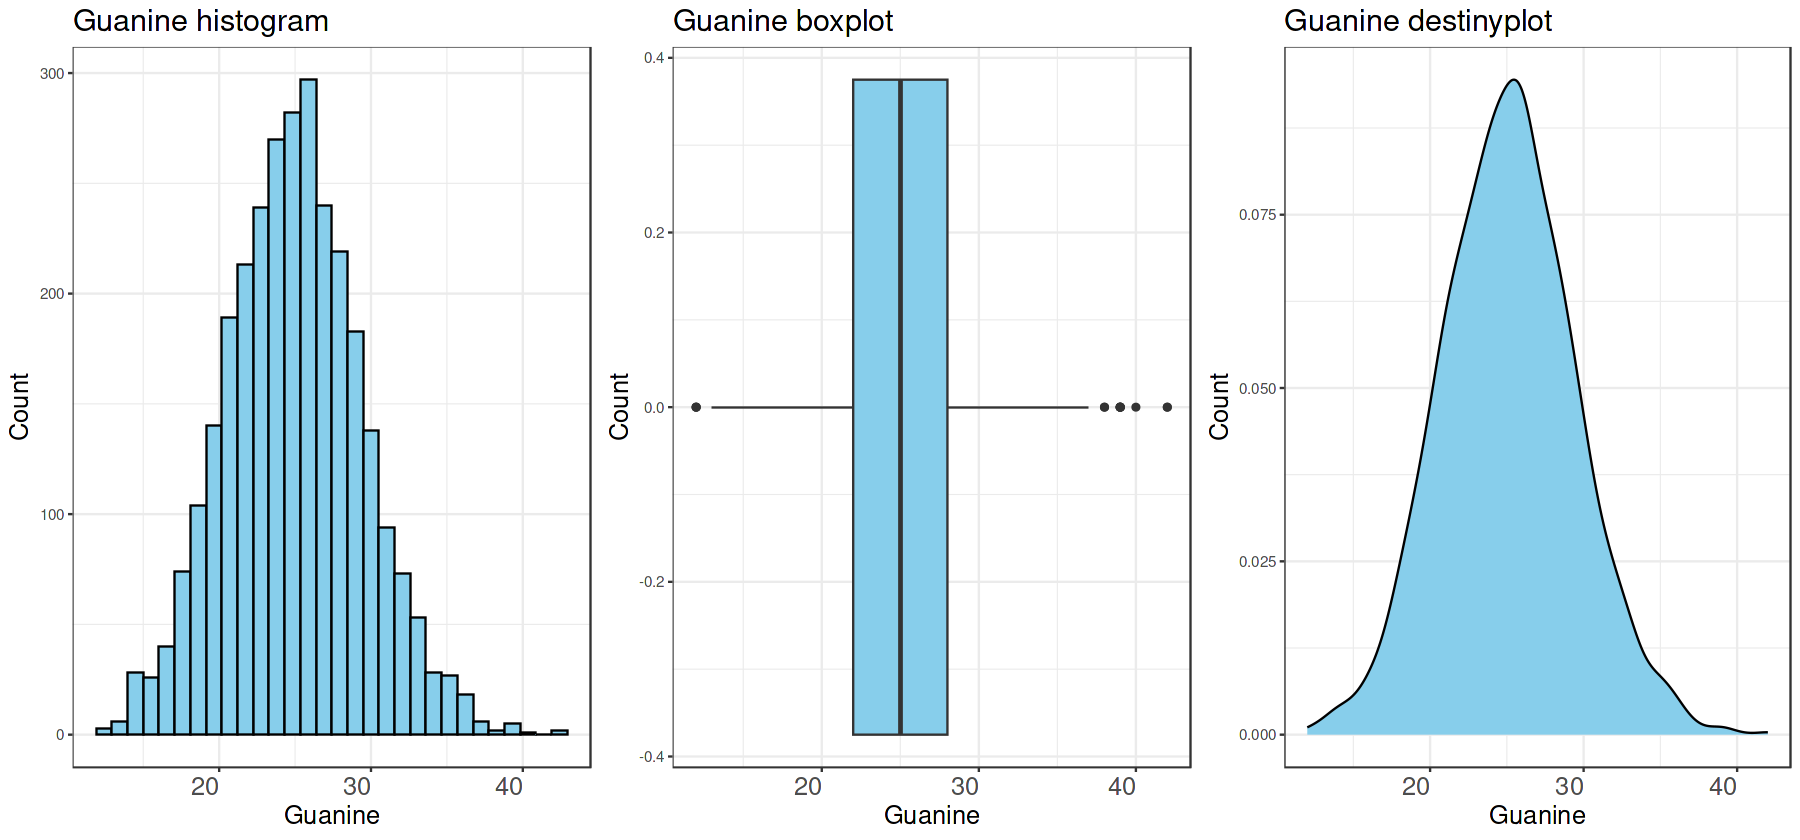

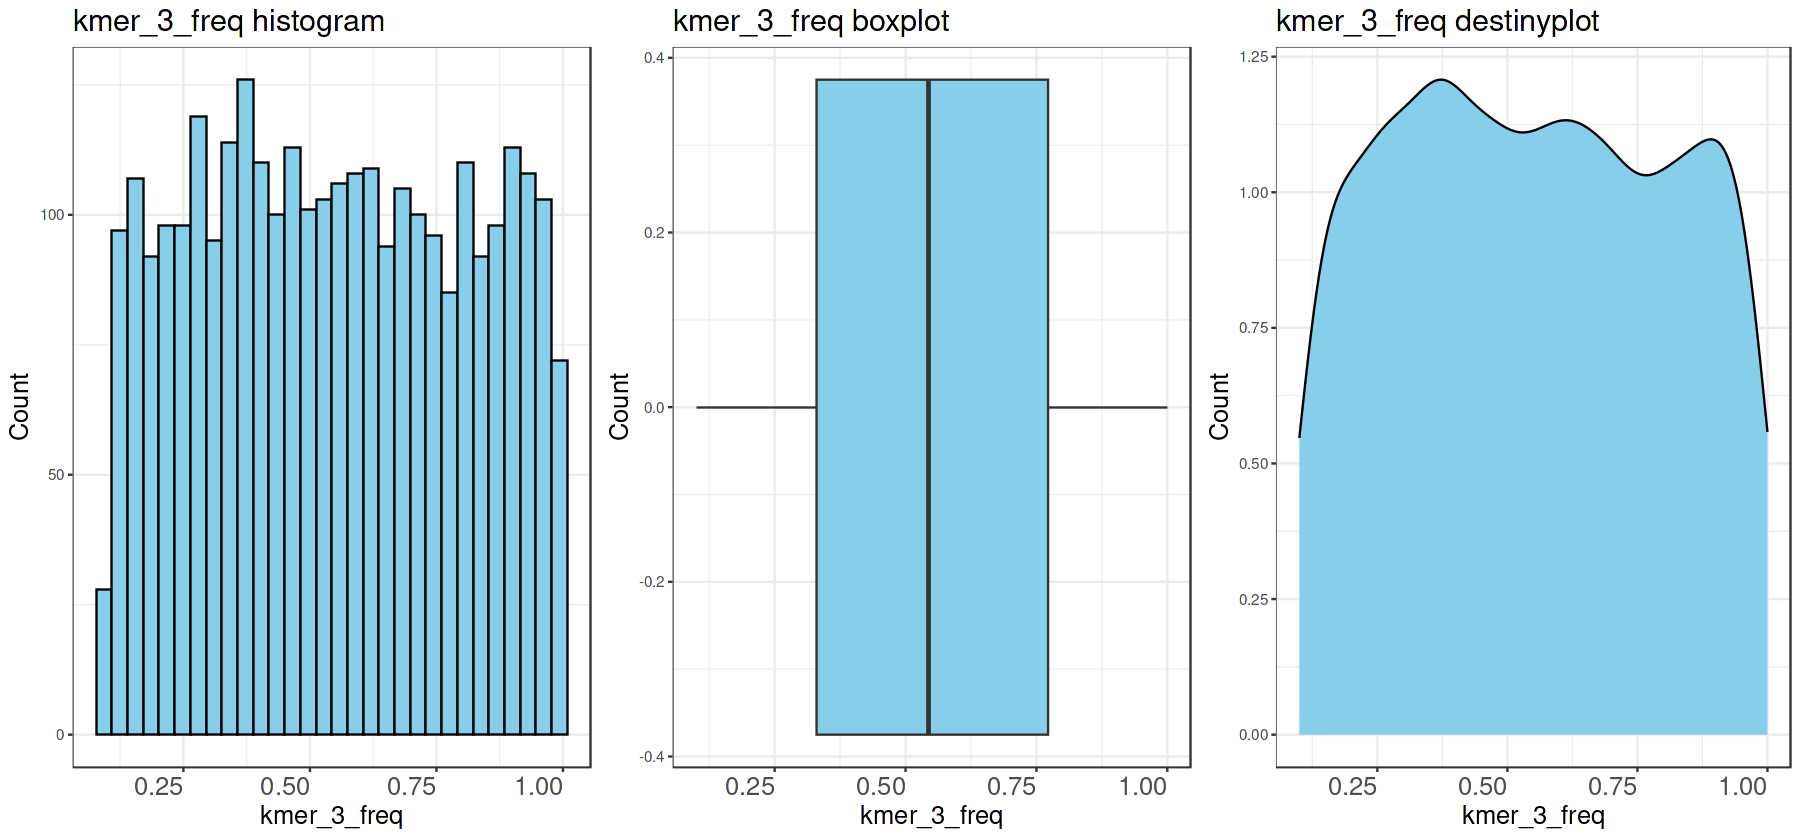

In [214]:
options(repr.plot.width = 15.0, repr.plot.height = 7.0)

for(i in num_cols){
    col_name <- i 
    a <- ggplot(df) + geom_histogram(aes(x= .data[[col_name]]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

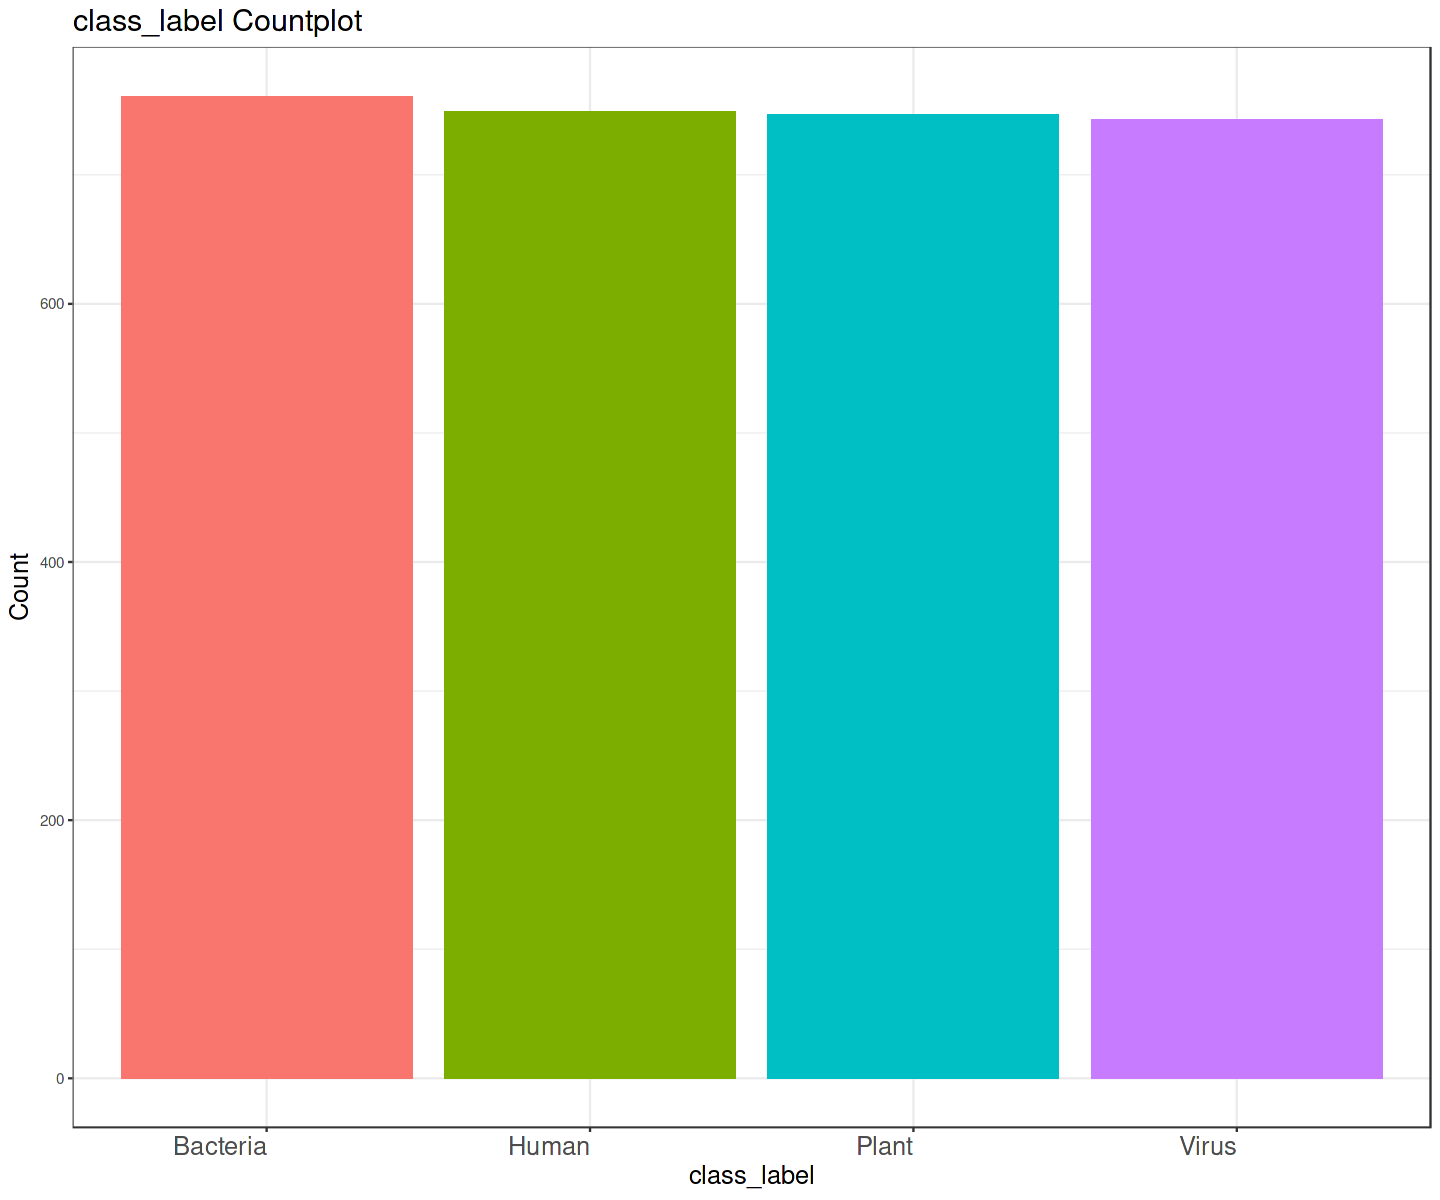

In [215]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)

ggplot(df) + geom_bar(aes(x= factor(class_label), fill = factor(class_label))) + 
#            geom_text(aes(x = factor(class_label) , y = n , label = round(n,2)),size = 5)+
            labs(title = 'class_label Countplot', x= 'class_label',y = 'Count') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

In [216]:
target <- df %>%  
        count(disease_risk ) %>%
        mutate(pct = paste(round(n / sum(n) * 100 ,1),'%'))

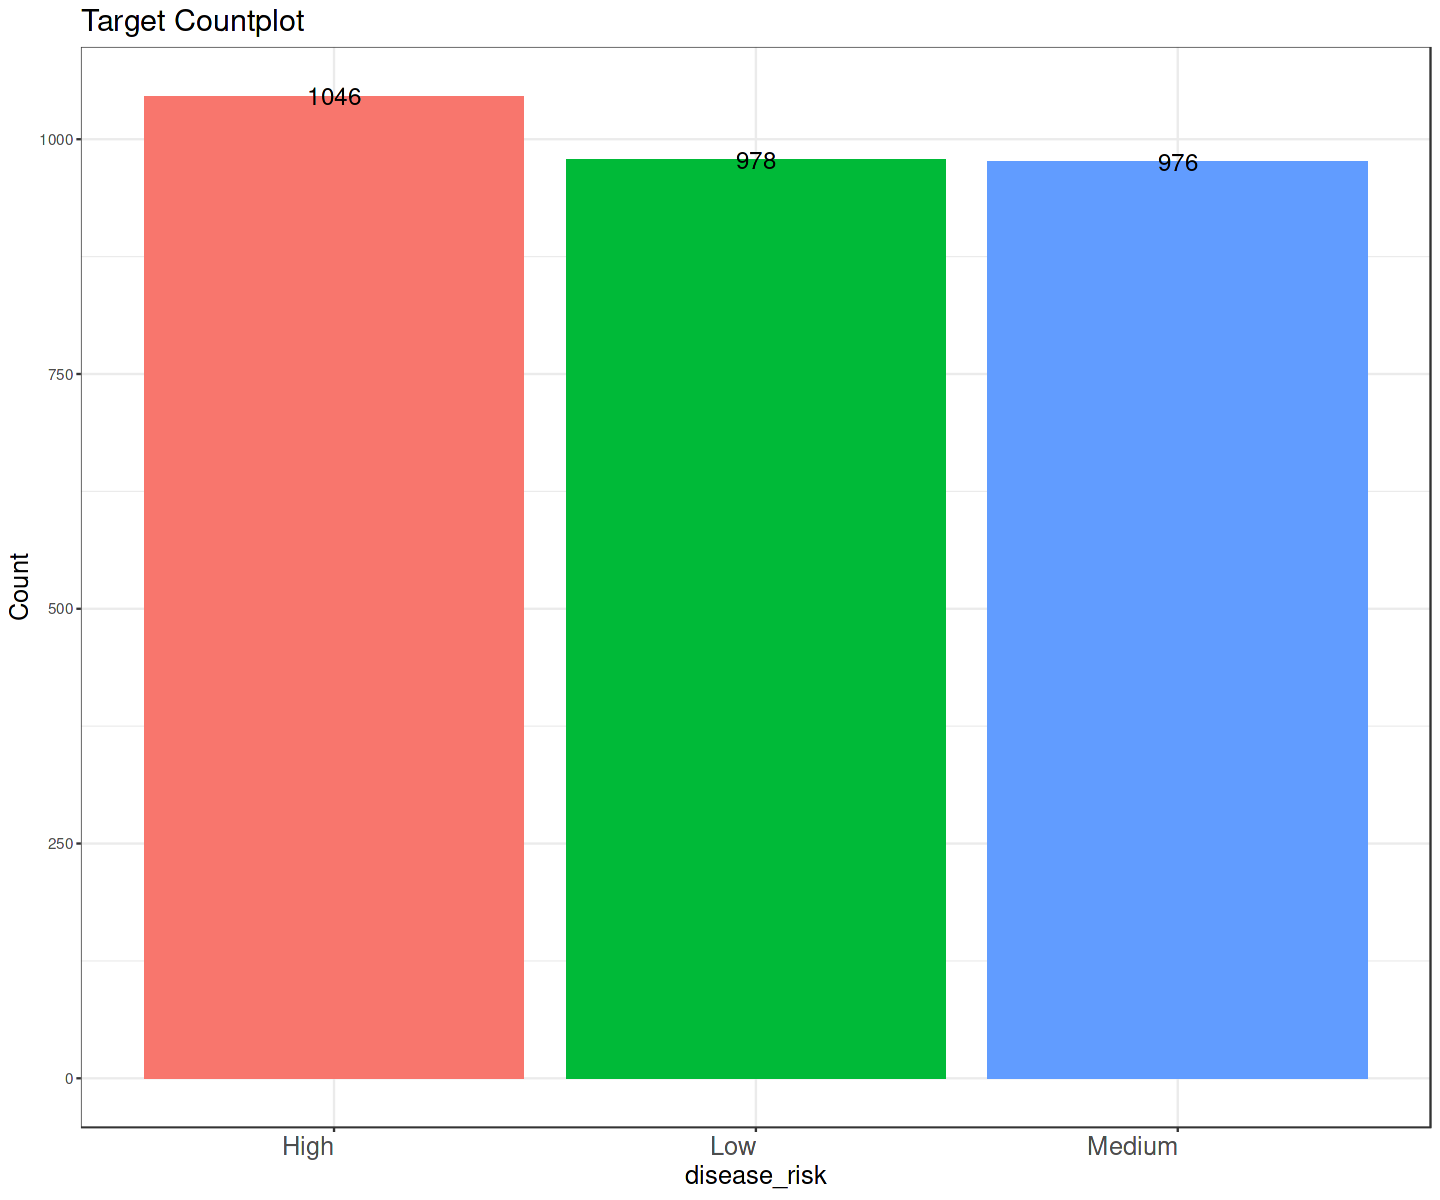

In [217]:
ggplot(target) + geom_col(aes(x= factor(disease_risk), y = n, fill = factor(disease_risk))) + 
            geom_text(aes(x = factor(disease_risk) , y = n , label = round(n,2)),size = 5)+
            labs(title = 'Target Countplot', x= 'disease_risk',y = 'Count') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

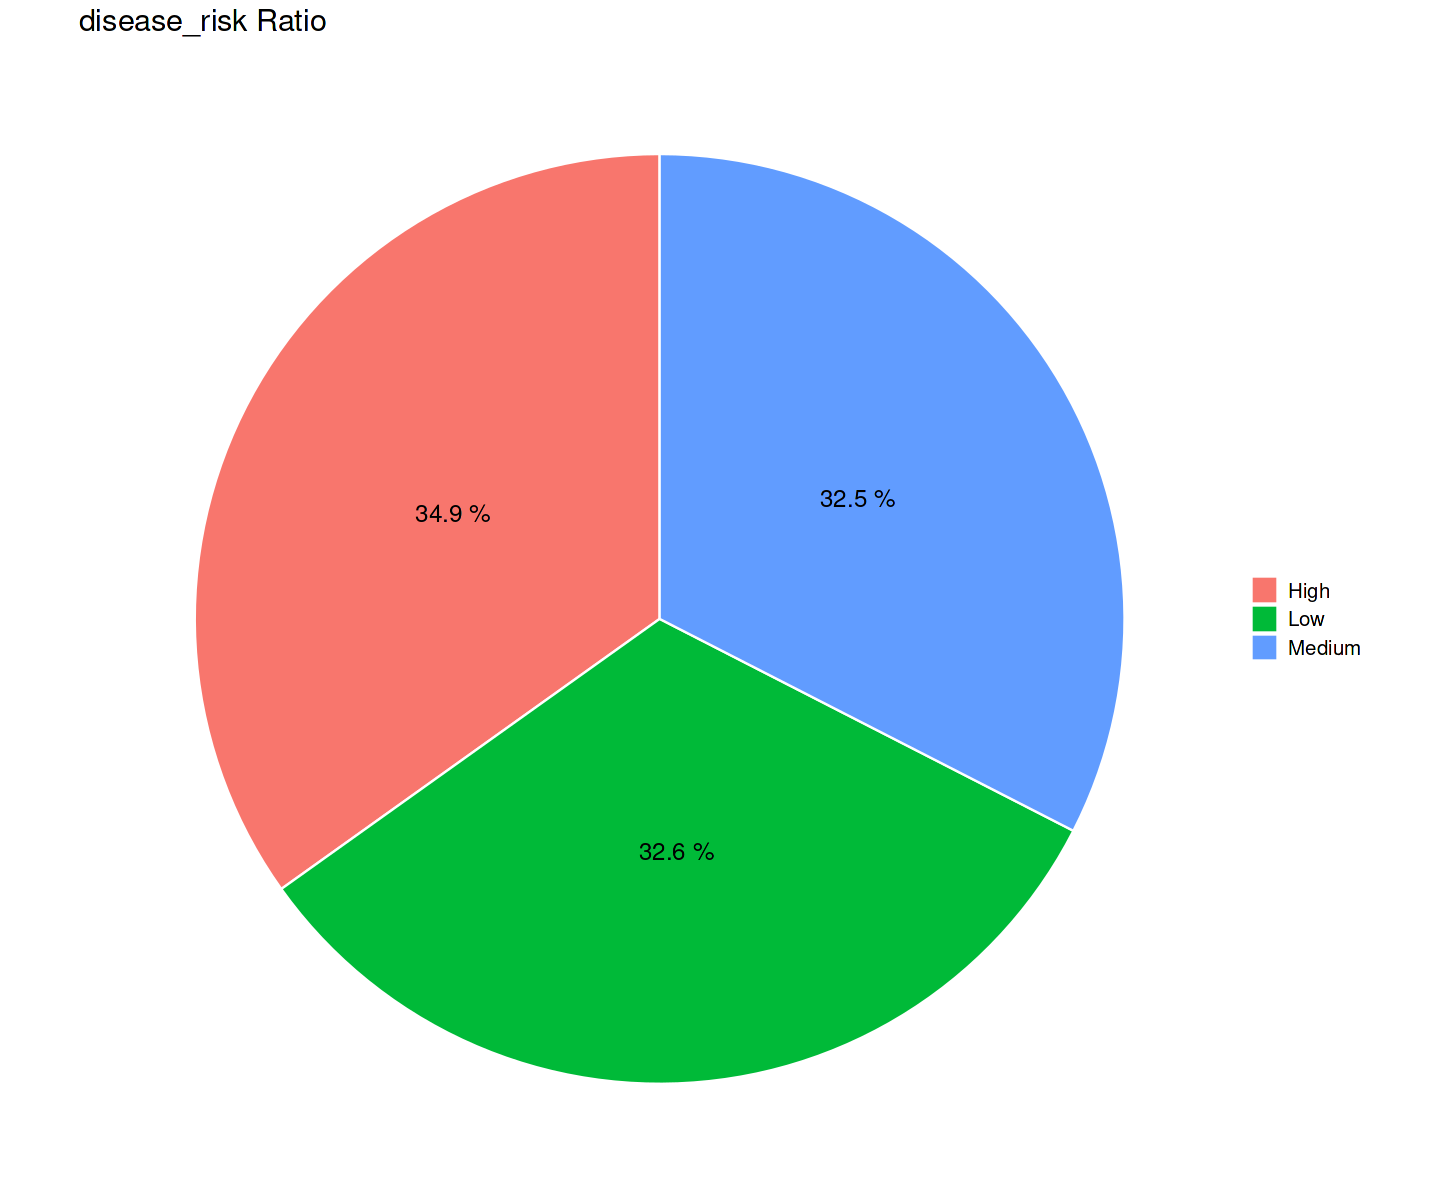

In [218]:
ggplot(target, aes(x = "", y = n, fill = factor(disease_risk))) +
  geom_col(width = 1, color = "white") +  
  coord_polar("y", start = 0) +           
  geom_text(aes(label = pct), 
            position = position_stack(vjust = 0.5),
            size = 5) +                   
  labs(title = "disease_risk Ratio", y = "", x = "") +
  theme_void() +
  theme(
    title = element_text(size = 15),
    legend.title = element_blank(),
    legend.text = element_text(size = 12)
  )

## **Correlation**

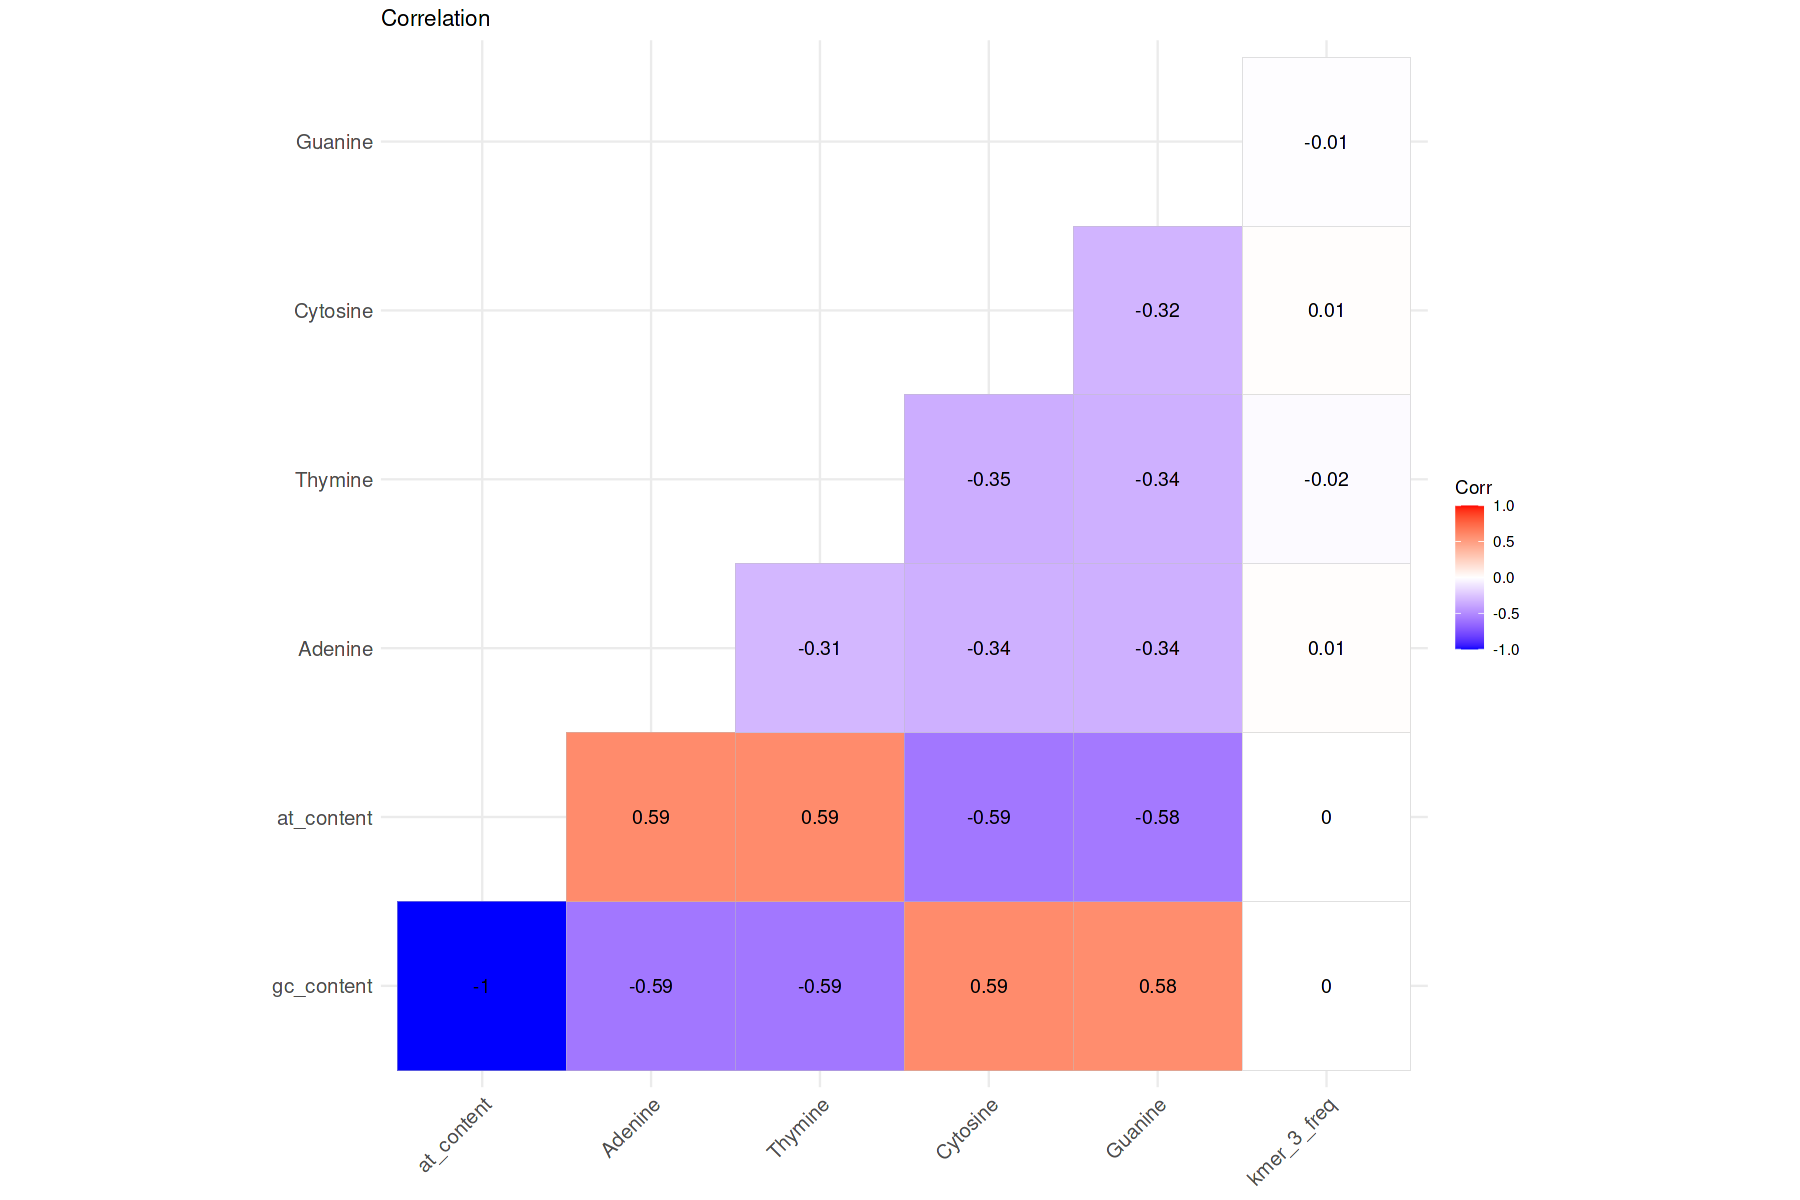

In [219]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')


**There is a strong negative correlation between gc_content and at_content,**   
**meaning that as the proportion of GC increases, the proportion of AT decreases.**

## **Correlation & pairplot by Target**

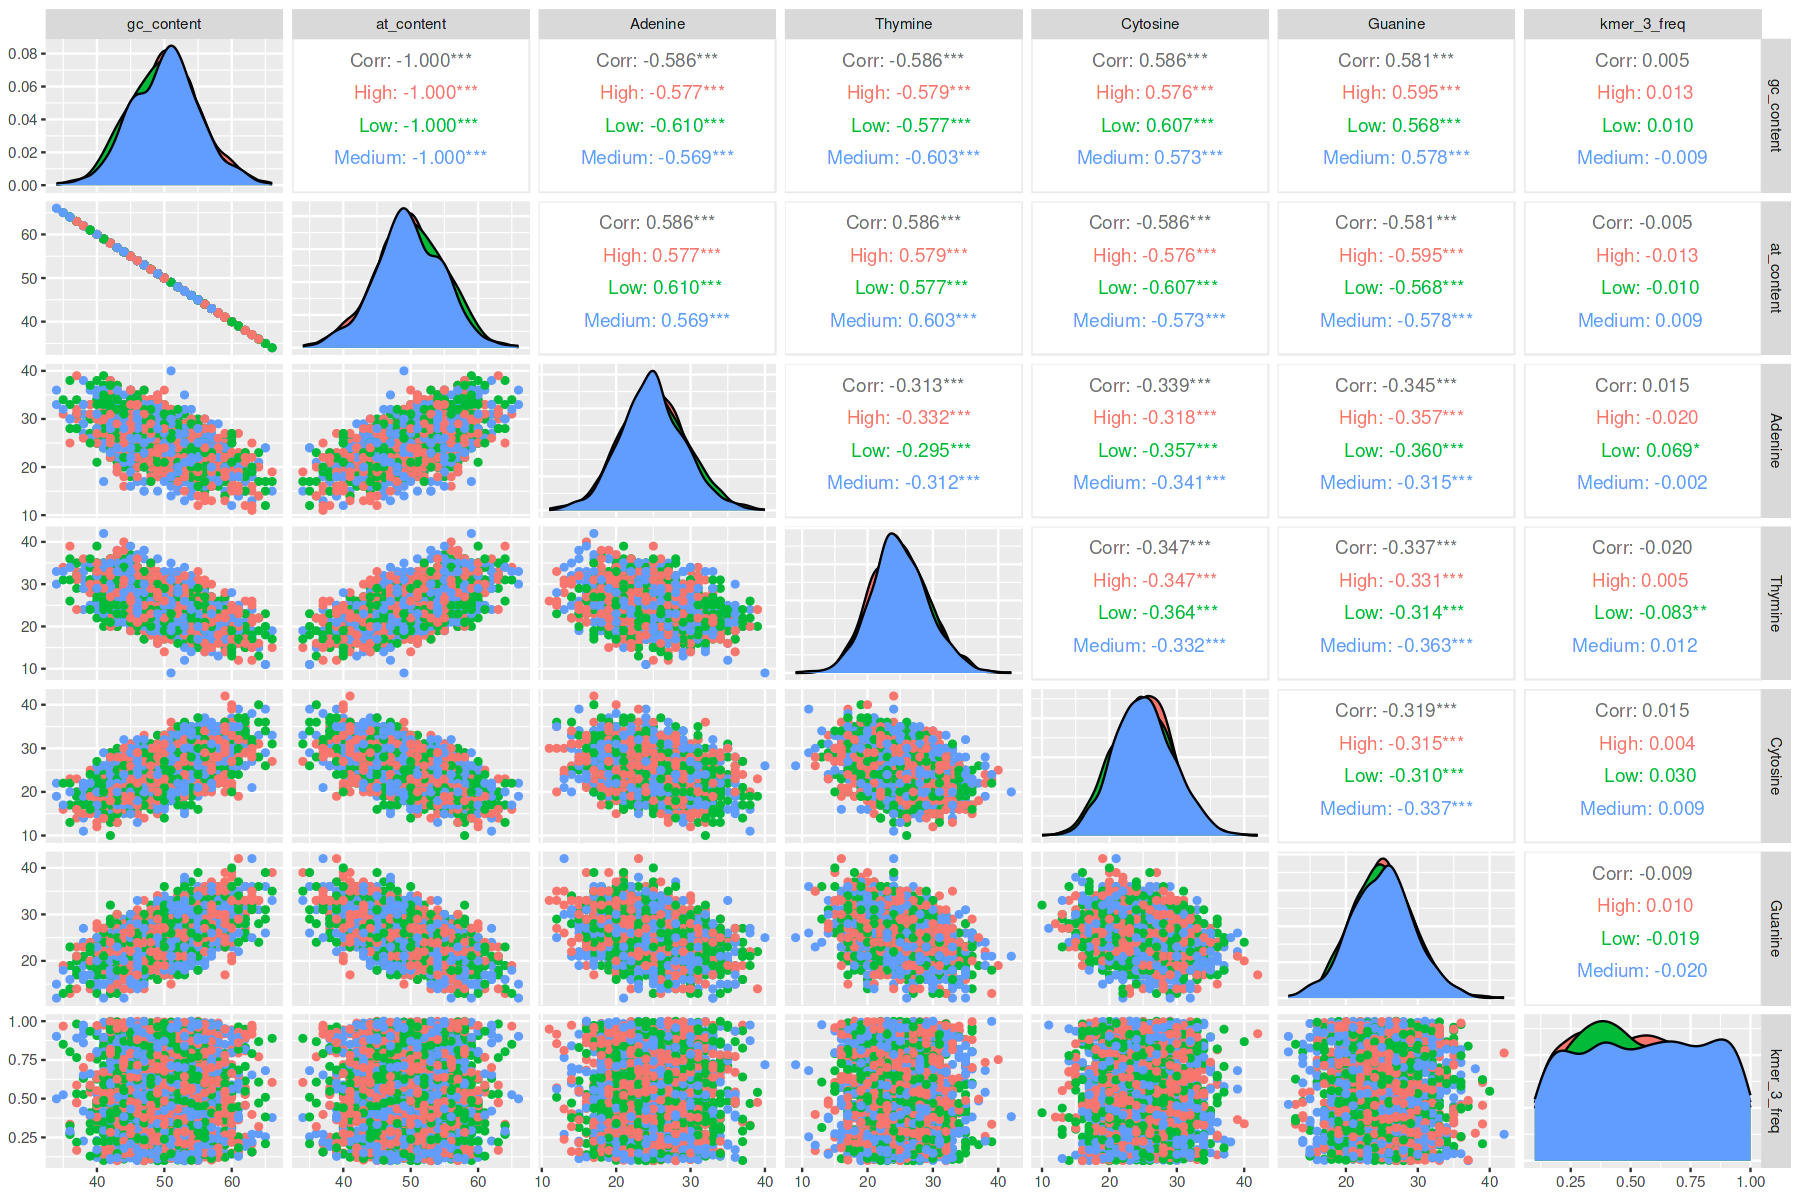

In [220]:
df2 <- df
ggpairs(
  df2,
  columns = num_cols,   
  mapping = aes(color = disease_risk) 
)

# **4. Modeling**

In [239]:
library(caret)
library(tidymodels)

## **Preprocessing**

In [222]:
# at_content remoeve, it's because There is a strong negative correlation between gc_content and at_content,
#df <- df %>% select(-at_content)


## **Train Test Split**

In [223]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [224]:
rec <- recipe(disease_risk ~ ., data = train) %>%
    step_zv(all_predictors()) %>%
    step_normalize(all_numeric_predictors()) %>%
    step_dummy(all_nominal_predictors())

## **ML**

In [225]:
# XGBoost

xgb_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

In [226]:
xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [227]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

In [228]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(500, 1000)),          
    mtry = mtry(range = c(5, 20)),               
    min_n = min_n(range = c(5, 15)),             
    tree_depth = tree_depth(range = c(8, 12)),   
    learn_rate = learn_rate(range = c(-2, -1))
  ) %>%
  finalize(train)

In [229]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = disease_risk)

In [230]:
xgb_res <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(yardstick::f_meas, yardstick::kap, yardstick::bal_accuracy),
  param_info = params
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/4

✓ Fold1: preprocessor 1/1, model 1/4

i Fold1: preprocessor 1/1, model 1/4 (extracts)

i Fold1: preprocessor 1/1, model 1/4 (predictions)

i Fold1: preprocessor 1/1, model 2/4

✓ Fold1: preprocessor 1/1, model 2/4

i Fold1: preprocessor 1/1, model 2/4 (extracts)

i Fold1: preprocessor 1/1, model 2/4 (predictions)

i Fold1: preprocessor 1/1, model 3/4

✓ Fold1: preprocessor 1/1, model 3/4

i Fold1: preprocessor 1/1, model 3/4 (extracts)

i Fold1: preprocessor 1/1, model 3/4 (predictions)

i Fold1: preprocessor 1/1, model 4/4

✓ Fold1: preprocessor 1/1, model 4/4

i Fold1: preprocessor 1/1, model 4/4 (extracts)

i Fold1: preprocessor 1/1, model 4/4 (predictions)

! Fold1: internal:
  While computing multiclass `precision()`, some levels had no ...
  (i.e. `true_positive + false_positive = 0`).
  Precision is undefined in this case, and those levels will be removed ...
  averaged result.
  Note tha

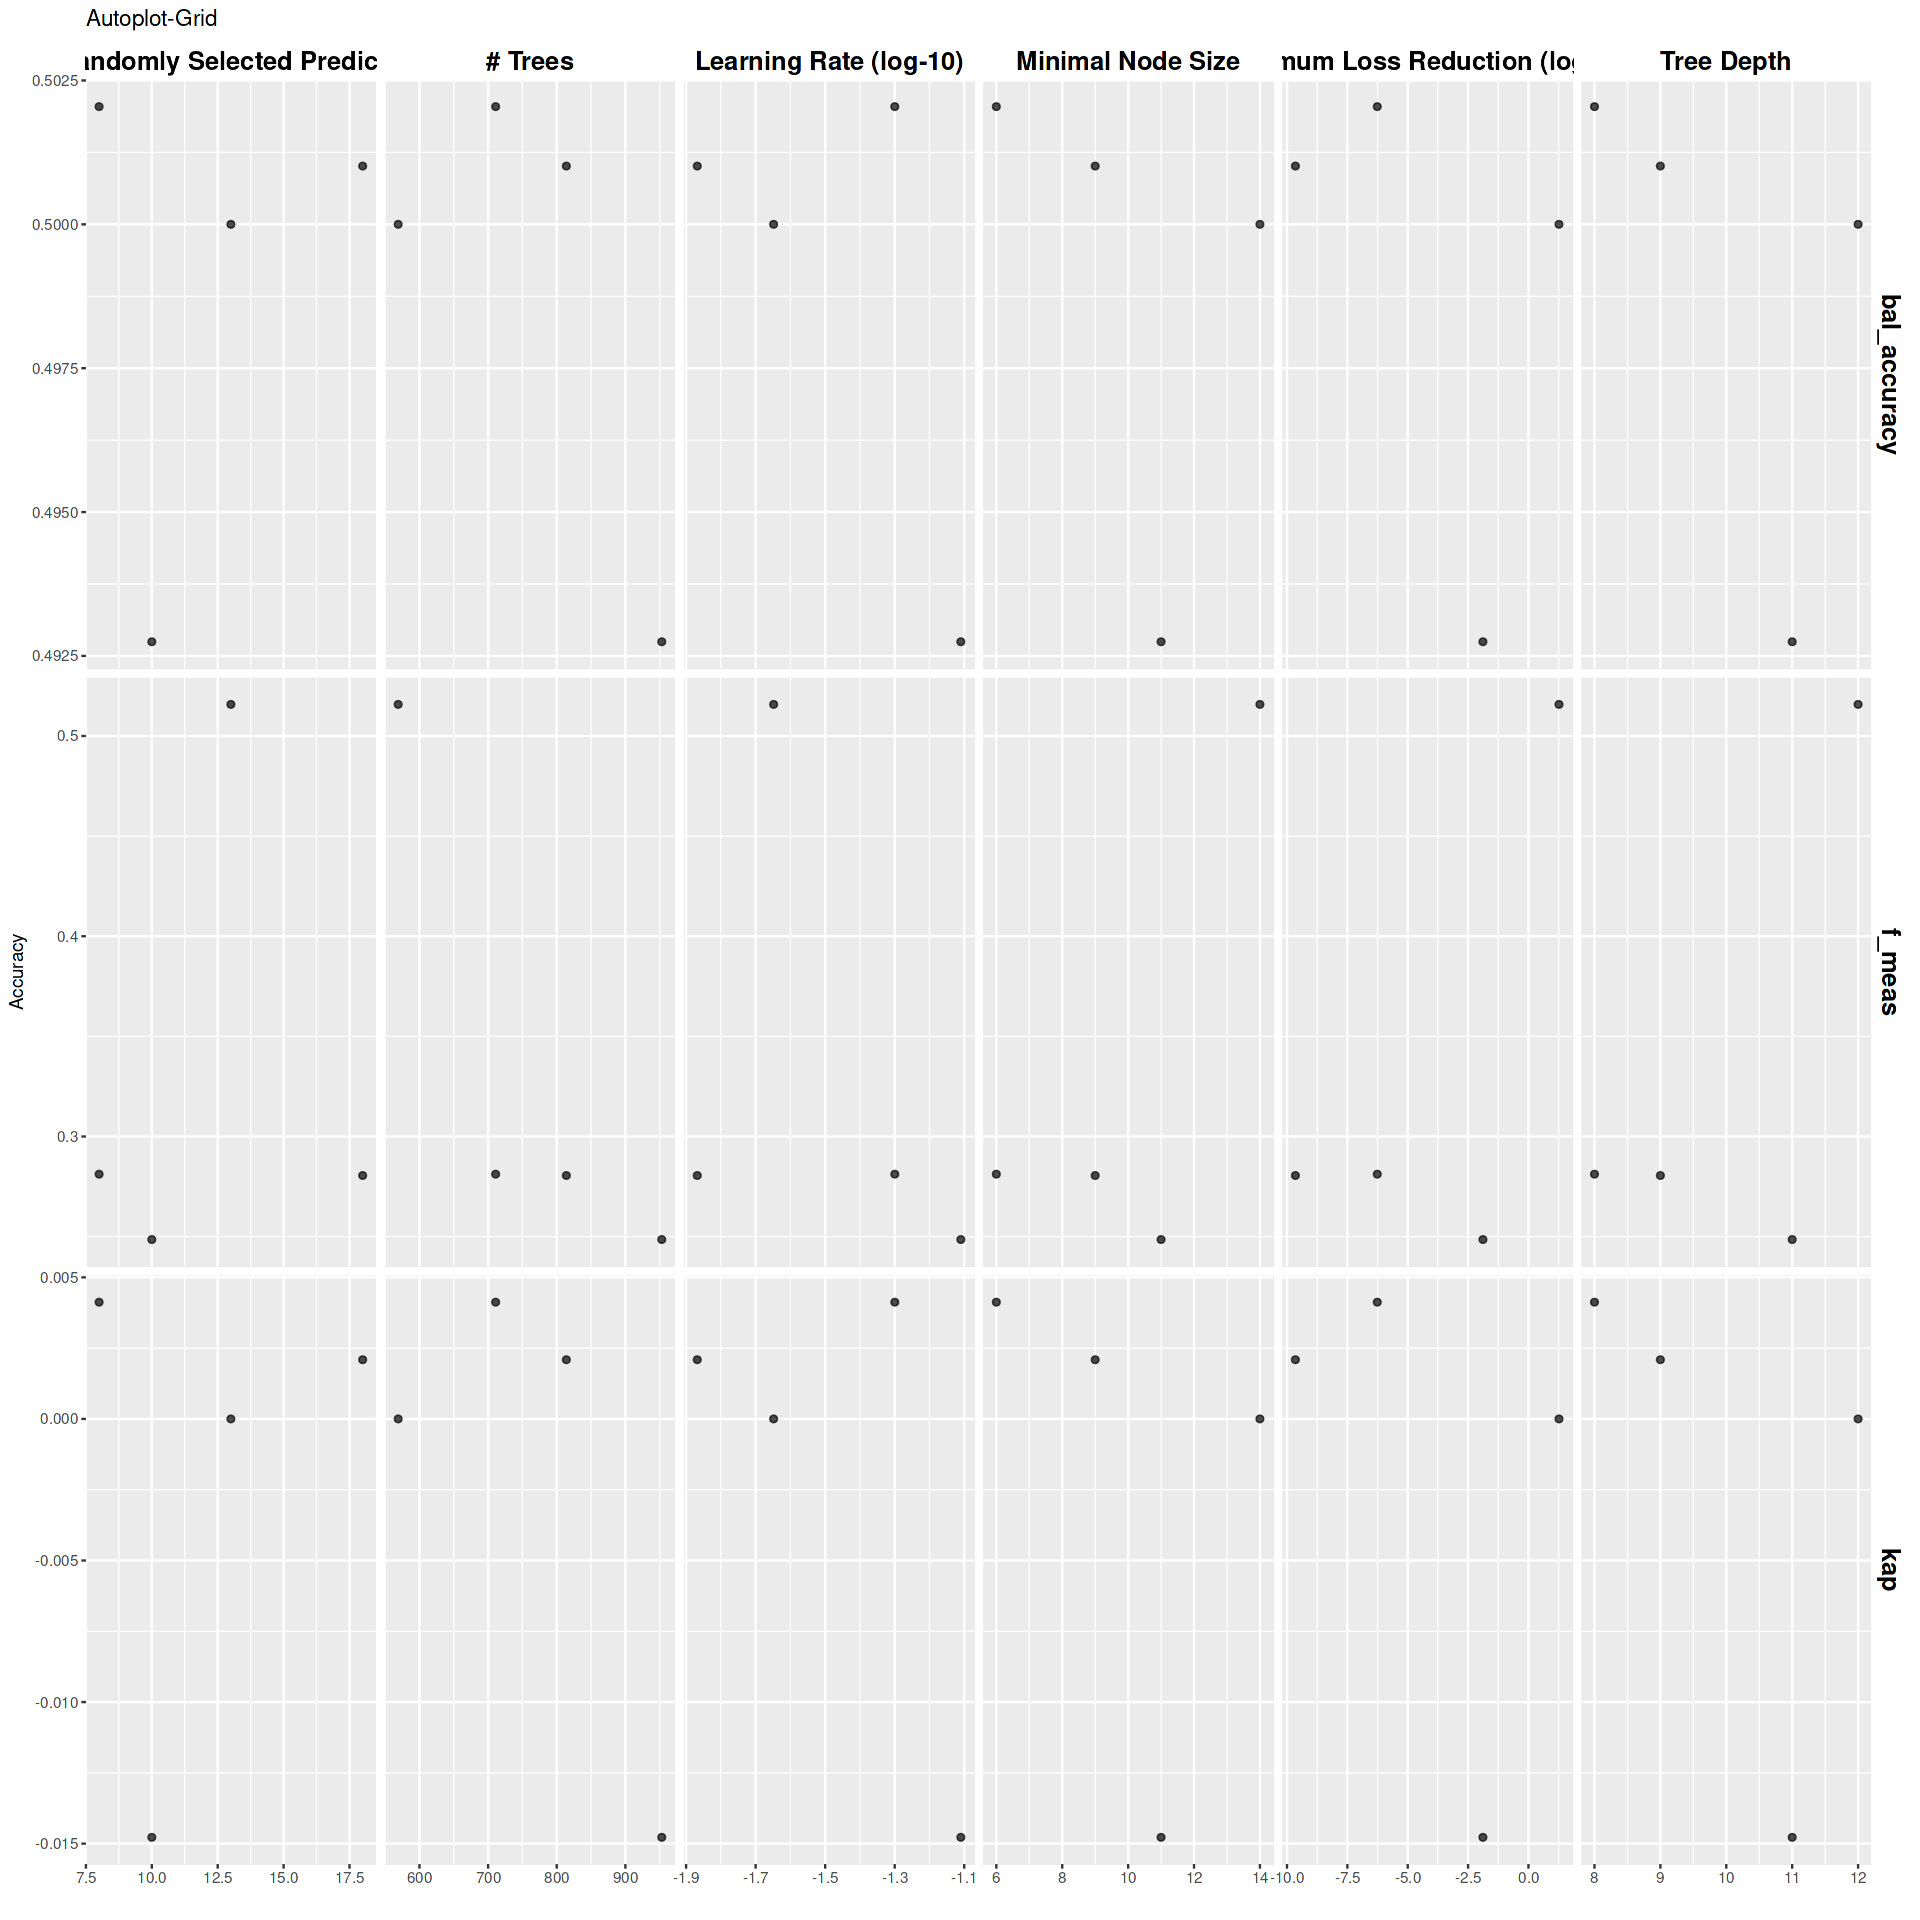

In [231]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [232]:
xgb_best <- select_best(xgb_res, metric = "f_meas")
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
13,569,14,12,0.02247989,18.41779,Preprocessor1_Model3


In [233]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 13
  trees = 569
  min_n = 14
  tree_depth = 12
  learn_rate = 0.0224798872981038
  loss_reduction = 18.4177920222155

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [234]:
final_fit <- final_xgb_res %>%
  fit(train)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 1.1 Mb 
call:
  xgboost::xgb.train(params = list(eta = 0.0224798872981038, max_depth = 12L, 
    gamma = 18.4177920222155, colsample_bytree = 1, colsample_bynode = 0.00431893687707641, 
    min_child_weight = 14L, subsample = 1), data = x$data, nrounds = 569L, 
    watchlist = x$watchlist, verbose = 0, nthread = c(system = 4), 
    objective = "multi:softprob", num_class = 3L)
params (as set within xgb.train):
  eta = "0.0224798872981038", max_depth = "12", gamma = "18.4177920222155", colsample_bytree = "1", colsample_bynode = "0.00431893687707641", min_child_weight = "14", subsample = "1", nthread = "4", objective = "mul

In [235]:
xgb_pred <- predict(final_fit, new_data = test, type = 'class')

In [236]:
xgb_pred <- as.data.frame(xgb_pred)
cm_xgb <- confusionMatrix(xgb_pred$.pred_class, test$disease_risk)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High    212 197    191
    Low       0   0      0
    Medium    0   0      0

Overall Statistics
                                          
               Accuracy : 0.3533          
                 95% CI : (0.3151, 0.3931)
    No Information Rate : 0.3533          
    P-Value [Acc > NIR] : 0.5154          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity               1.0000     0.0000        0.0000
Specificity               0.0000     1.0000        1.0000
Pos Pred Value            0.3533        NaN           NaN
Neg Pred Value               NaN     0.6717        0.6817
Prevalence                0.3533     0.3283        0.3183
Detection Rate            0.3533     0.0000        0.0000
Det

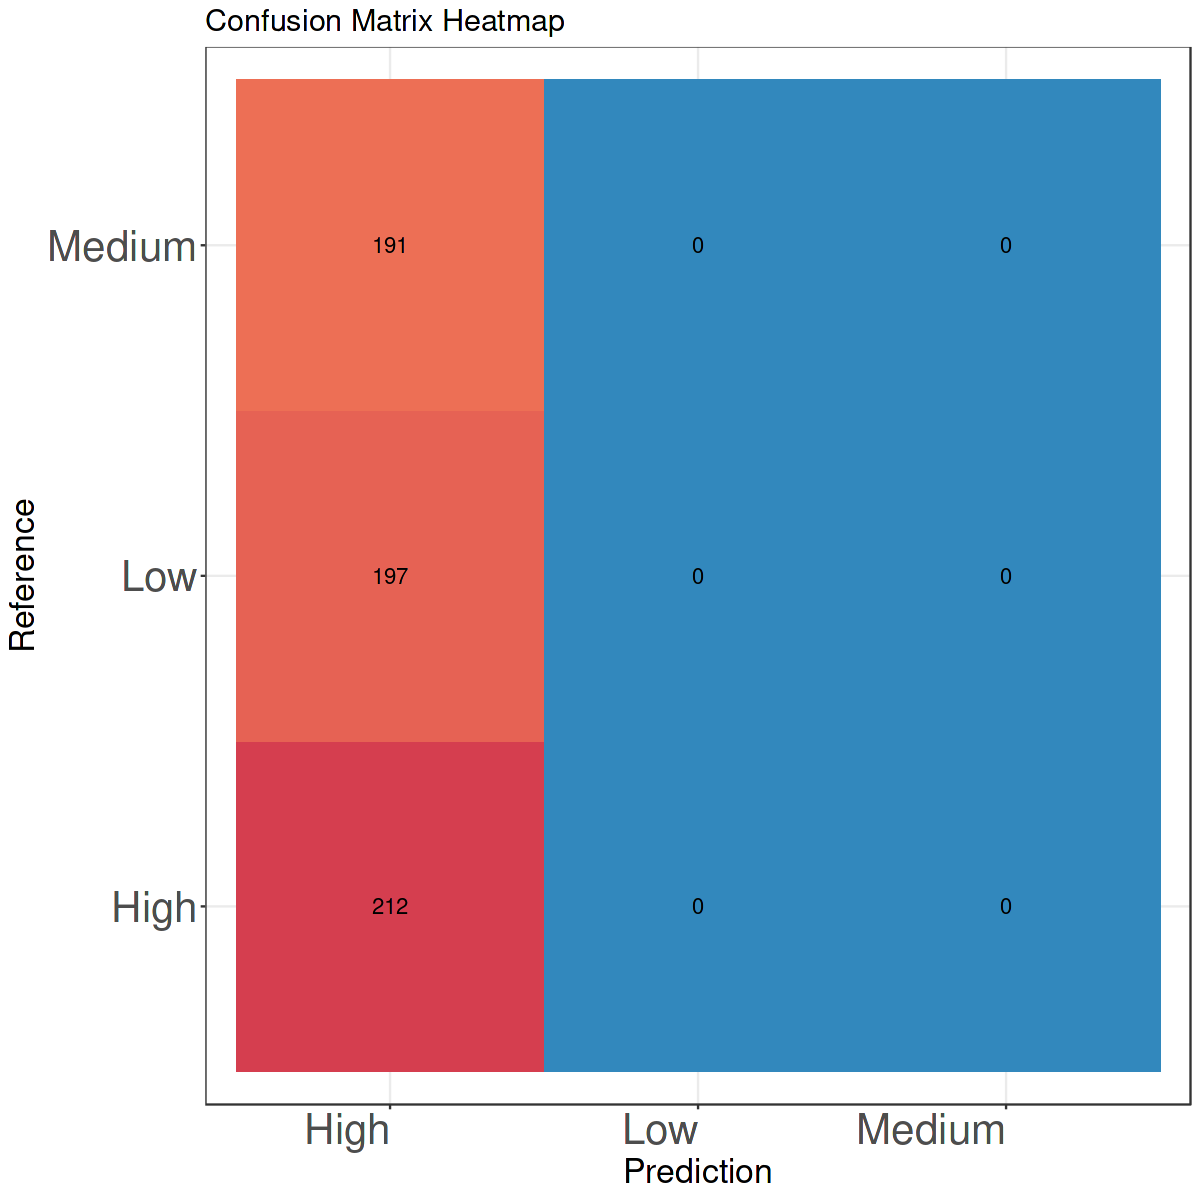

In [237]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
xgb_heatmap <- data.frame(cm_xgb$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

In [244]:
#LGBM

library(bonsai)

lgbm <-  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "lightgbm",
             is_unbalance = TRUE,
             num_leaves = tune(),
             method = "catboost",
             nthread  = future::availableCores()
) %>%
  set_mode(mode = "classification")

# Workflow
lgbm_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(lgbm)



In [246]:
# params
params <- lgbm_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(50, 500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(5, 20)),
    tree_depth = tree_depth(range = c(3, 15)),
    learn_rate = learn_rate(range = c(-2, -1)),
    num_leaves = num_leaves(range = c(100, 300))
  ) %>%
  finalize(train)

#Controol
lgbm_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

#Tune
lgbm_tune <- tune_grid(
  lgbm_wf,
  resamples = folds,
  grid = 5,
  control = lgbm_ctrl,
  metrics = metric_set(yardstick::f_meas, yardstick::kap, yardstick::bal_accuracy),
  param_info = params
)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/5

✓ Fold1: preprocessor 1/1, model 1/5

i Fold1: preprocessor 1/1, model 1/5 (extracts)

i Fold1: preprocessor 1/1, model 1/5 (predictions)

i Fold1: preprocessor 1/1, model 2/5

✓ Fold1: preprocessor 1/1, model 2/5

i Fold1: preprocessor 1/1, model 2/5 (extracts)

i Fold1: preprocessor 1/1, model 2/5 (predictions)

i Fold1: preprocessor 1/1, model 3/5

✓ Fold1: preprocessor 1/1, model 3/5

i Fold1: preprocessor 1/1, model 3/5 (extracts)

i Fold1: preprocessor 1/1, model 3/5 (predictions)

i Fold1: preprocessor 1/1, model 4/5

✓ Fold1: preprocessor 1/1, model 4/5

i Fold1: preprocessor 1/1, model 4/5 (extracts)

i Fold1: preprocessor 1/1, model 4/5 (predictions)

i Fold1: preprocessor 1/1, model 5/5

✓ Fold1: preprocessor 1/1, model 5/5

i Fold1: preprocessor 1/1, model 5/5 (extracts)

i Fold1: preprocessor 1/1, model 5/5 (predictions)

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2

In [248]:
# Select the best
best_lgbm <- select_best(lgbm_tune, metric = "f_meas")
final_lgbm <- finalize_workflow(lgbm_wf, best_lgbm)

# Fit
lgbm_fit <- final_lgbm %>% 
  fit(data = train)

# Predict
lgbm_pred <- predict(lgbm_fit, new_data = test, type='class')

In [250]:
lgbm_pred <- as.data.frame(lgbm_pred)
cm_lgbm <- confusionMatrix(lgbm_pred$.pred_class, test$disease_risk)
cm_lgbm

Confusion Matrix and Statistics

          Reference
Prediction High Low Medium
    High    168 146    145
    Low      25  33     29
    Medium   19  18     17

Overall Statistics
                                          
               Accuracy : 0.3633          
                 95% CI : (0.3248, 0.4032)
    No Information Rate : 0.3533          
    P-Value [Acc > NIR] : 0.3181          
                                          
                  Kappa : 0.0257          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: High Class: Low Class: Medium
Sensitivity               0.7925     0.1675       0.08901
Specificity               0.2500     0.8660       0.90954
Pos Pred Value            0.3660     0.3793       0.31481
Neg Pred Value            0.6879     0.6803       0.68132
Prevalence                0.3533     0.3283       0.31833
Detection Rate            0.2800     0.0550       0.02833
Det

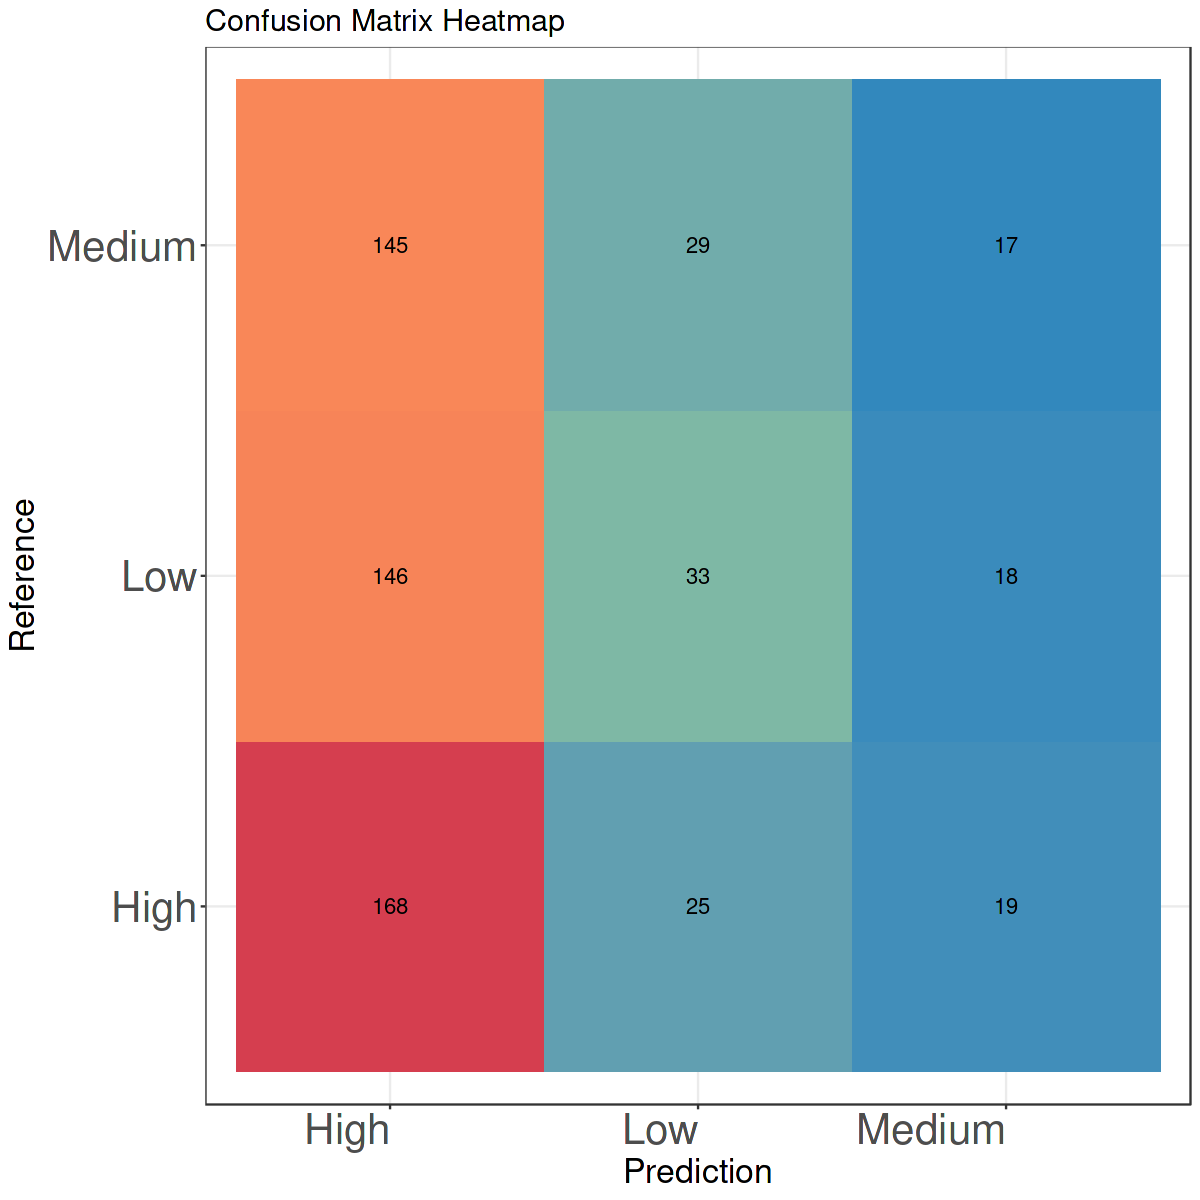

In [251]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
lgbm_heatmap <- data.frame(cm_lgbm$table)

ggplot(lgbm_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

**The low accuracy of the model suggests that the independent variables do not sufficiently explain the dependent variable, disease_risk**

---------
**Thankyou. Please leave your advice in the comments**